In [46]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearnex import patch_sklearn, config_context
patch_sklearn()
import glob

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Dataset importado de https://www.gti.ssr.upm.es/data/Vehicle_database.html

In [2]:
vehicle = glob.glob('../data/data_svm/vehicles/**/*.png')
non_vehicle = glob.glob('../data/data_svm/non-vehicles/**/*.png')

In [3]:
len(vehicle)

3425

In [4]:
len(non_vehicle)

3900

Mostrar la imagen con un vehículo

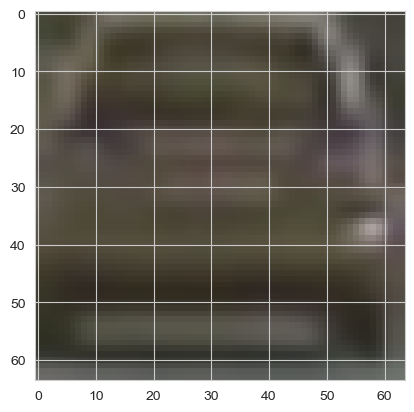

In [5]:
img_color = cv2.imread(vehicle[10])
plt.imshow(img_color)

In [6]:
img_color.shape

(64, 64, 3)

Calcular el HOG de la imagen

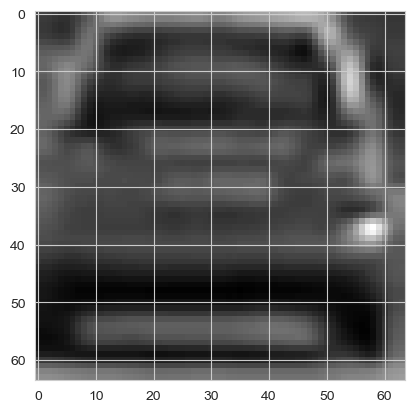

In [7]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [8]:
features, hog_image = hog(img_gray, 
                          orientations=11, 
                          pixels_per_cell=(16, 16),
                          cells_per_block=(2, 2), 
                          transform_sqrt= False,
                          visualize=True,
                          feature_vector=True)

In [9]:
features.shape

(396,)

In [10]:
hog_image.shape

(64, 64)

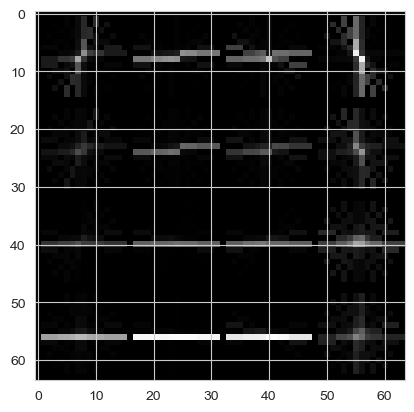

In [11]:
plt.imshow(hog_image, cmap='gray')

Extraemos las features HOG para ambos tipos de datos

In [12]:
vehicle_hog_accum = list()

for i in vehicle:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    vehicle_hog_feature, vehicle_hog_image = hog(img_gray, 
                                                 orientations=11, 
                                                 pixels_per_cell=(16, 16),
                                                 cells_per_block=(2, 2), 
                                                 transform_sqrt= False,
                                                 visualize=True,
                                                 feature_vector=True)
    
    vehicle_hog_accum.append(vehicle_hog_feature)

In [13]:
X_vehicle = np.vstack(vehicle_hog_accum).astype(np.float64) # Arreglo en columna
y_vehicle = np.ones(len(X_vehicle)) # Etiquetado de los vectores como 1 que significa que es un vehículo

In [14]:
X_vehicle.shape

(3425, 396)

In [15]:
y_vehicle.shape

(3425,)

In [16]:
non_vehicle_hog_accum = list()

for i in non_vehicle:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    non_vehicle_hog_feature, non_vehicle_hog_image = hog(img_gray, 
                                                 orientations=11, 
                                                 pixels_per_cell=(16, 16),
                                                 cells_per_block=(2, 2), 
                                                 transform_sqrt= False,
                                                 visualize=True,
                                                 feature_vector=True)
    
    non_vehicle_hog_accum.append(non_vehicle_hog_feature)

In [17]:
X_non_vehicle = np.vstack(non_vehicle_hog_accum).astype(np.float64) # Arreglo en columna
y_non_vehicle = np.zeros(len(X_non_vehicle)) # Etiquetado de los vectores como 0 que significa que es no un vehículo

In [18]:
X_non_vehicle.shape

(3900, 396)

In [19]:
y_non_vehicle.shape

(3900,)

Combinación de datos para alimentar el SVM

In [20]:
X = np.vstack((X_vehicle, X_non_vehicle))
X.shape

(7325, 396)

In [21]:
y = np.hstack((y_vehicle, y_non_vehicle))
y.shape

(7325,)

Generación de datos de entrenamiento y de prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(5860, 396)

In [25]:
y_train.shape

(5860,)

Clasificador y entrenamiento

In [27]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [28]:
y_pred = svc_model.predict(X_test)

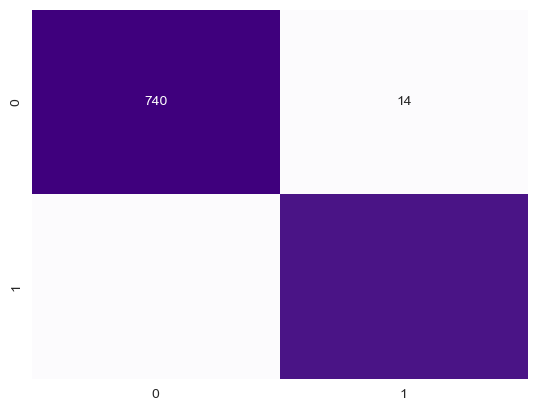

In [43]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm,  annot=True, fmt='g', cmap='Purples', cbar=False) 
plt.show()

In [36]:
print(cm)

[[740  14]
 [ 18 693]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       754
         1.0       0.98      0.97      0.98       711

    accuracy                           0.98      1465
   macro avg       0.98      0.98      0.98      1465
weighted avg       0.98      0.98      0.98      1465



Grid search

In [44]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}

In [47]:
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   0.4s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.537 total time=   0.3s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.537 total time=   0.3s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.537 total time=   0.3s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.537 total time=   0.4s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.924 total time=   0.4s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.3s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.936 total time=   0.2s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.3s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.926 total time=   0.3s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.949 total time=   0.2s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=4)

In [48]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [49]:
grid_search.best_estimator_

SVC(C=100, gamma=0.1)

In [50]:
grid_predictions = grid_search.predict(X_test)

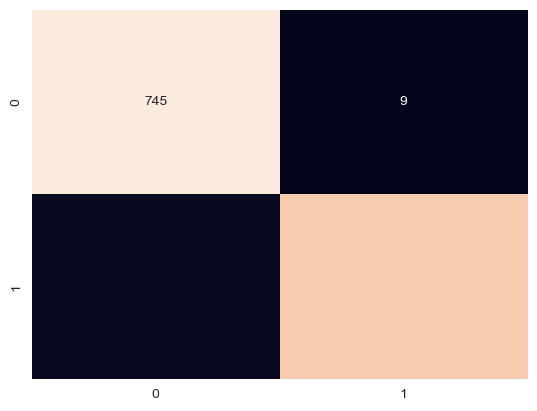

In [52]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, fmt='g', cbar=False) 
plt.show()

In [53]:
cm

array([[745,   9],
       [ 24, 687]], dtype=int64)

In [55]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       754
         1.0       0.99      0.97      0.98       711

    accuracy                           0.98      1465
   macro avg       0.98      0.98      0.98      1465
weighted avg       0.98      0.98      0.98      1465

